<a href="https://colab.research.google.com/github/MisterRus01/AbstractFactoryDZ/blob/master/anovaLv6Vjezba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('glass.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

(214, 10)

In [ ]:
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
analyzed_data = ['RI', 'Na', 'Mg']
print(data[analyzed_data].describe())

               RI          Na          Mg
count  214.000000  214.000000  214.000000
mean     1.518365   13.407850    2.684533
std      0.003037    0.816604    1.442408
min      1.511150   10.730000    0.000000
25%      1.516522   12.907500    2.115000
50%      1.517680   13.300000    3.480000
75%      1.519157   13.825000    3.600000
max      1.533930   17.380000    4.490000


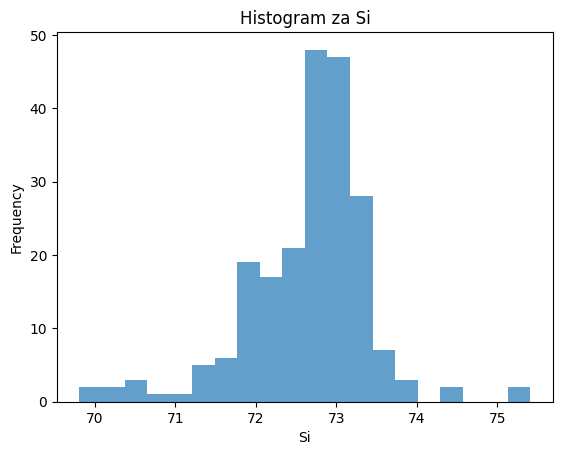

In [ ]:
data['Si'].plot(kind='hist', bins=20, alpha=0.7)
plt.title('Histogram za Si')
plt.xlabel('Si')
plt.show()

In [ ]:
from scipy.stats import shapiro, levene

In [ ]:
stat, p = shapiro(data['Si'])
print("Shapiro-Wilk test: stat=%.3f, p=%.3f" % (stat, p))

# Leveneov test za homoscedastičnost
stat, p = levene(data[data['Type'] == 'group1']['Si'],
                 data[data['Type'] == 'group2']['Si'],
                 data[data['Type'] == 'group3']['Si'])
print("Leveneov test: stat=%.3f, p=%.3f" % (stat, p))

Shapiro-Wilk test: stat=0.920, p=0.000
Leveneov test: stat=nan, p=nan


In [ ]:

df = pd.read_csv('glass.csv')

numerical_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

print("Provjera normalnosti podataka (Shapiro-Wilk test):")
for col in numerical_columns:
    for glass_type in df['Type'].unique():
        group = df[df['Type'] == glass_type][col]
        stat, p = shapiro(group)
        print(f"Varijabla: {col}, Tip stakla: {glass_type}, Statistika: {stat:.4f}, P-vrijednost: {p:.4f}")
        if p > 0.05:
            print(f" -> Podaci su normalni za {col} (tip: {glass_type}).")
        else:
            print(f" -> Podaci NISU normalni za {col} (tip: {glass_type}).")

print("\nProvjera homoscedastičnosti (Leveneov test):")
for col in numerical_columns:
    groups = [df[df['Type'] == glass_type][col] for glass_type in df['Type'].unique()]
    stat, p = levene(*groups)
    print(f"Varijabla: {col}, Statistika: {stat:.4f}, P-vrijednost: {p:.4f}")
    if p > 0.05:
        print(f" -> Varijanse su jednake za {col}.")
    else:
        print(f" -> Varijanse NISU jednake za {col}.")

Provjera normalnosti podataka (Shapiro-Wilk test):
Varijabla: RI, Tip stakla: 1, Statistika: 0.8791, P-vrijednost: 0.0000
 -> Podaci NISU normalni za RI (tip: 1).
Varijabla: RI, Tip stakla: 2, Statistika: 0.7223, P-vrijednost: 0.0000
 -> Podaci NISU normalni za RI (tip: 2).
Varijabla: RI, Tip stakla: 3, Statistika: 0.8308, P-vrijednost: 0.0055
 -> Podaci NISU normalni za RI (tip: 3).
Varijabla: RI, Tip stakla: 5, Statistika: 0.8970, P-vrijednost: 0.1215
 -> Podaci su normalni za RI (tip: 5).
Varijabla: RI, Tip stakla: 6, Statistika: 0.6897, P-vrijednost: 0.0011
 -> Podaci NISU normalni za RI (tip: 6).
Varijabla: RI, Tip stakla: 7, Statistika: 0.8237, P-vrijednost: 0.0002
 -> Podaci NISU normalni za RI (tip: 7).
Varijabla: Na, Tip stakla: 1, Statistika: 0.9462, P-vrijednost: 0.0046
 -> Podaci NISU normalni za Na (tip: 1).
Varijabla: Na, Tip stakla: 2, Statistika: 0.8995, P-vrijednost: 0.0000
 -> Podaci NISU normalni za Na (tip: 2).
Varijabla: Na, Tip stakla: 3, Statistika: 0.9481, P-vri

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Transformacija podataka: log-transformacija
df['SiO2_log'] = np.log(df['Si'])

# Ponovno testiranje nakon transformacije

# 1. Shapiro-Wilk test za normalnost
stat, p = shapiro(df['SiO2_log'])
print("Shapiro-Wilk test nakon log-transformacije: stat=%.3f, p=%.3f" % (stat, p))

# 2. Leveneov test za homoscedastičnost
# Provjera grupa u 'Type_of_glass'
groups = df['Type'].unique()

# Stvaranje lista za Leveneov test (različite grupe)
grouped_data = [df[df['Type'] == group]['SiO2_log'] for group in groups]

# Izvršavanje Leveneovog testa
stat, p = levene(*grouped_data)
print("Leveneov test nakon log-transformacije: stat=%.3f, p=%.3f" % (stat, p))

Shapiro-Wilk test nakon log-transformacije: stat=0.917, p=0.000
Leveneov test nakon log-transformacije: stat=2.164, p=0.059


In [ ]:
from scipy.stats import f_oneway

# Priprema podataka za ANOVA analizu
grouped_data = [df[df['Type'] == group]['SiO2_log'] for group in groups]

# ANOVA analiza
f_stat, p_value = f_oneway(*grouped_data)
print("ANOVA rezultati nakon transformacije: F-stat=%.3f, p=%.3f" % (f_stat, p_value))

ANOVA rezultati nakon transformacije: F-stat=2.737, p=0.020


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0003    1.0 -0.0053 0.0047  False
     1      3   -0.003 0.9039 -0.0111 0.0052  False
     1      5  -0.0036 0.8651 -0.0127 0.0055  False
     1      6    0.008 0.2656 -0.0027 0.0187  False
     1      7   0.0047  0.327  -0.002 0.0114  False
     2      3  -0.0026 0.9362 -0.0107 0.0055  False
     2      5  -0.0033 0.9016 -0.0124 0.0058  False
     2      6   0.0083 0.2221 -0.0023 0.0189  False
     2      7    0.005 0.2455 -0.0016 0.0116  False
     3      5  -0.0007    1.0 -0.0118 0.0105  False
     3      6   0.0109 0.1203 -0.0015 0.0234  False
     3      7   0.0077 0.1643 -0.0016 0.0169  False
     5      6   0.0116  0.115 -0.0015 0.0247  False
     5      7   0.0083 0.1699 -0.0018 0.0184  False
     6      7  -0.0033 0.9637 -0.0148 0.0082  False
---------------------------------------------------


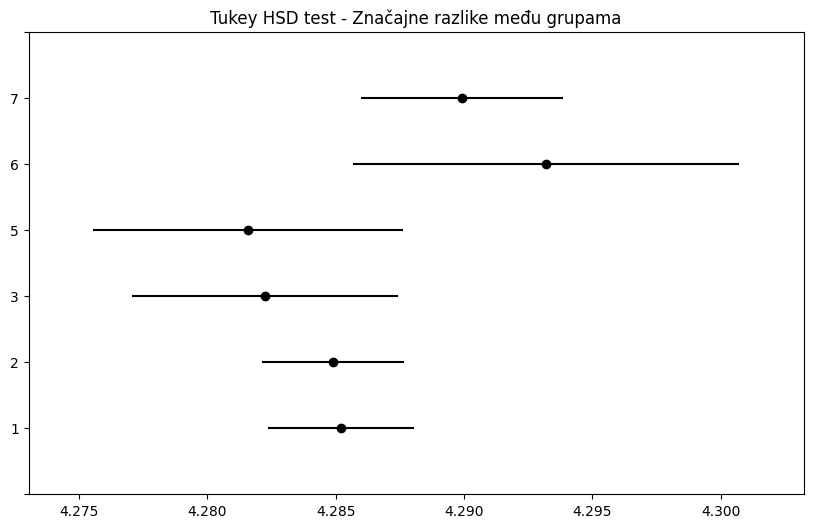

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Post hoc analiza
tukey = pairwise_tukeyhsd(endog=data['SiO2_log'], groups=data['Type'], alpha=0.05)
print(tukey)

# Grafički prikaz rezultata Tukey HSD testa
tukey.plot_simultaneous()
plt.title('Tukey HSD test - Značajne razlike među grupama')
plt.show()